* ada 2000 customer
* dataset bulan april 2023
* 370000 data
* terdiri dari brt, non brt, royaltrans, mikrotrans

# Background Business

Transjakarta is the first Bus Rapid Transit (BRT) transport system in Southeast and South Asia operating since 2004 in Jakarta, Indonesia. TransJakarta was designed as a mass transport mode to support the capital's hectic activities. With the longest track in the world (251.2 km), as well as having 287 bus stops spread across 13 corridors, Transjakarta which initially operates from Pkl. 05.00 - Pkl. 22.00 WIB, now operates 24 hours.

<url>https://transjakarta.co.id/produk-dan-layanan/layanan-bus/transjakarta/<url>

# Business Problem

Even though TransJakarta plays a significant role in Jakarta's transportation network, there are still some issues that need to be addressed, such as overcrowding.

# Data Analysis Goal

So that, the goal of this analysis is to identify the corridors or routes with the highest passenger volume.

# Data Information

Here are the details of the data:
- Transaction ID (transID): A unique identifier for every transaction.
- Customer ID (payCardID): The main identifier for the customer. This is likely the card number that the customer uses as a ticket to enter and exit the public transportation system.
- Customer Bank (payCardBank): The name of the bank that issued the customer's card.
- Customer Name (payCardName): The customer's name that is embedded on the card.
- Customer Sex (payCardSex): The customer's sex that is embedded on the card.
- Customer Birth Year (payCardBirthDate): The year the customer was born.
- Corridor ID (corridoriD): An identifier for the route that the customer took.
- Corridor Name (corridorName): The name of the route that the customer took, including the start and end stops.
- Direction (direction): Indicates whether the customer was traveling going (0) or back (1).
- Tap In Stop ID (tapinStops): The identifier for the stop where the customer entered the public transportation system.
- Tap In Stop Name (tapinStopsName): The name of the stop where the customer entered the public transportation system.
- Tap In Stop Latitude (tapinStopsLat): The latitude coordinate of the stop where the customer entered the public transportation system.
- Tap In Stop Longitude (tapinStopsLon): The longitude coordinate of the stop where the customer entered the public transportation system.
- Tap In Stop Sequence (stopStartSeq): The sequence of the stop where the customer entered the public transportation system relative to the direction they were traveling. For example, the first stop would be sequenced as 1.
- Tap In Time (tapinTime): The date and time that the customer entered the public transportation system.
- Tap Out Stop ID (tapOutStops): The identifier for the stop where the customer exited the public transportation system.
- Tap Out Stop Name (tapOutStopsName): The name of the stop where the customer exited the public transportation system.
- Tap Out Stop Latitude (tapOutStopsLat): The latitude coordinate of the stop where the customer exited the public transportation system.
- Tap Out Stop Longitude (tapOutStopsLon): The longitude coordinate of the stop where the customer exited the public transportation system.
- Tap Out Stop Sequence (stopEndSeq): The sequence of the stop where the customer exited the public transportation system relative to the direction they were traveling. For example, the first stop would be sequenced as 1.
- Tap Out Time (tapOutTime): The date and time that the customer exited the public transportation system.
- Payment Amount (payAmount): The amount of fare the customer paid for the trip.

# Import Library

In [142]:
# This code block imports several libraries that will be used for data analysis.
# - pandas (pd): This library is used for data manipulation and analysis. It provides data structures like DataFrames and Series, which are essential for working with tabular data.
# - numpy (np): This library is used for numerical computations. While not used in this specific example, it's a common library for data science tasks involving arrays and matrices.
# - seaborn (sns): This library is built on top of matplotlib and is used for creating statistical data visualizations. It provides a higher-level interface for creating informative and aesthetically pleasing plots. (Not used in this example).
# - matplotlib.pyplot (plt): This library is the core plotting library in Python. It provides functions for creating various types of plots, such as scatter plots, histograms, and bar charts. (Not used in this example).
# - missingno (msn): This library is used for visualizing missing data in a DataFrame. It provides functions for creating heatmaps and other visualizations that can help you identify patterns in missing data. (Not used in this example).

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

# Data Check

In [143]:
# See all of the dataframe them at once. *since pandas truncates the display of DataFrames to a limited number of columns
pd.set_option('display.max_columns', None)

In [144]:
# Import the file and display
df = pd.read_csv('/Users/naufaldaffa/Documents/Purwadhika /Public Transportation Transaction - Transjakarta/Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [145]:
# See summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## Descriptive Statistic

Summary statistics provided by .describe():
* Count: The number of non-null values in each column.
* Mean: The average value of the column (only applicable to numerical columns).
* Standard deviation (std): How spread out the data is from the mean (only applicable to numerical columns).
* Minimum (min): The smallest value in the column (only applicable to numerical columns).
* Percentiles (25%, 50%, 75%): These percentiles divide the data into four equal parts. The 25th percentile (Q1) is the value at which 25% of the data falls below and 75% falls above. The 50th percentile (Q2) is the median, the middle value when the data is ordered from smallest to largest. The 75th percentile (Q3) is the value at which 75% of the data falls below and 25% falls above (only applicable to numerical columns).
* Maximum (max): The largest value in the column (only applicable to numerical columns).


In [146]:
# Check summary statistics for numerical columns in the DataFrame.
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [147]:
# Check summary statistics for categorical columns in the DataFrame.
df.describe()
df.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


## Unique Value each Feature

In [148]:
# Count the number of distinct (unique) values in each column of the DataFrame.
df.nunique()

transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64

In [149]:
df['tapInStopsName'].unique()

array(['Pal Putih', 'Kemenkes 2', 'Gg. Kunir II', ..., 'AKR Tower',
       'Jln. Kartika Meruya Selatan', 'Jln. Gunung Galunggung 1'],
      dtype=object)

## Missing Value Check

In [150]:
# Check total count of missing values in each column of the DataFrame.
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

<Axes: >

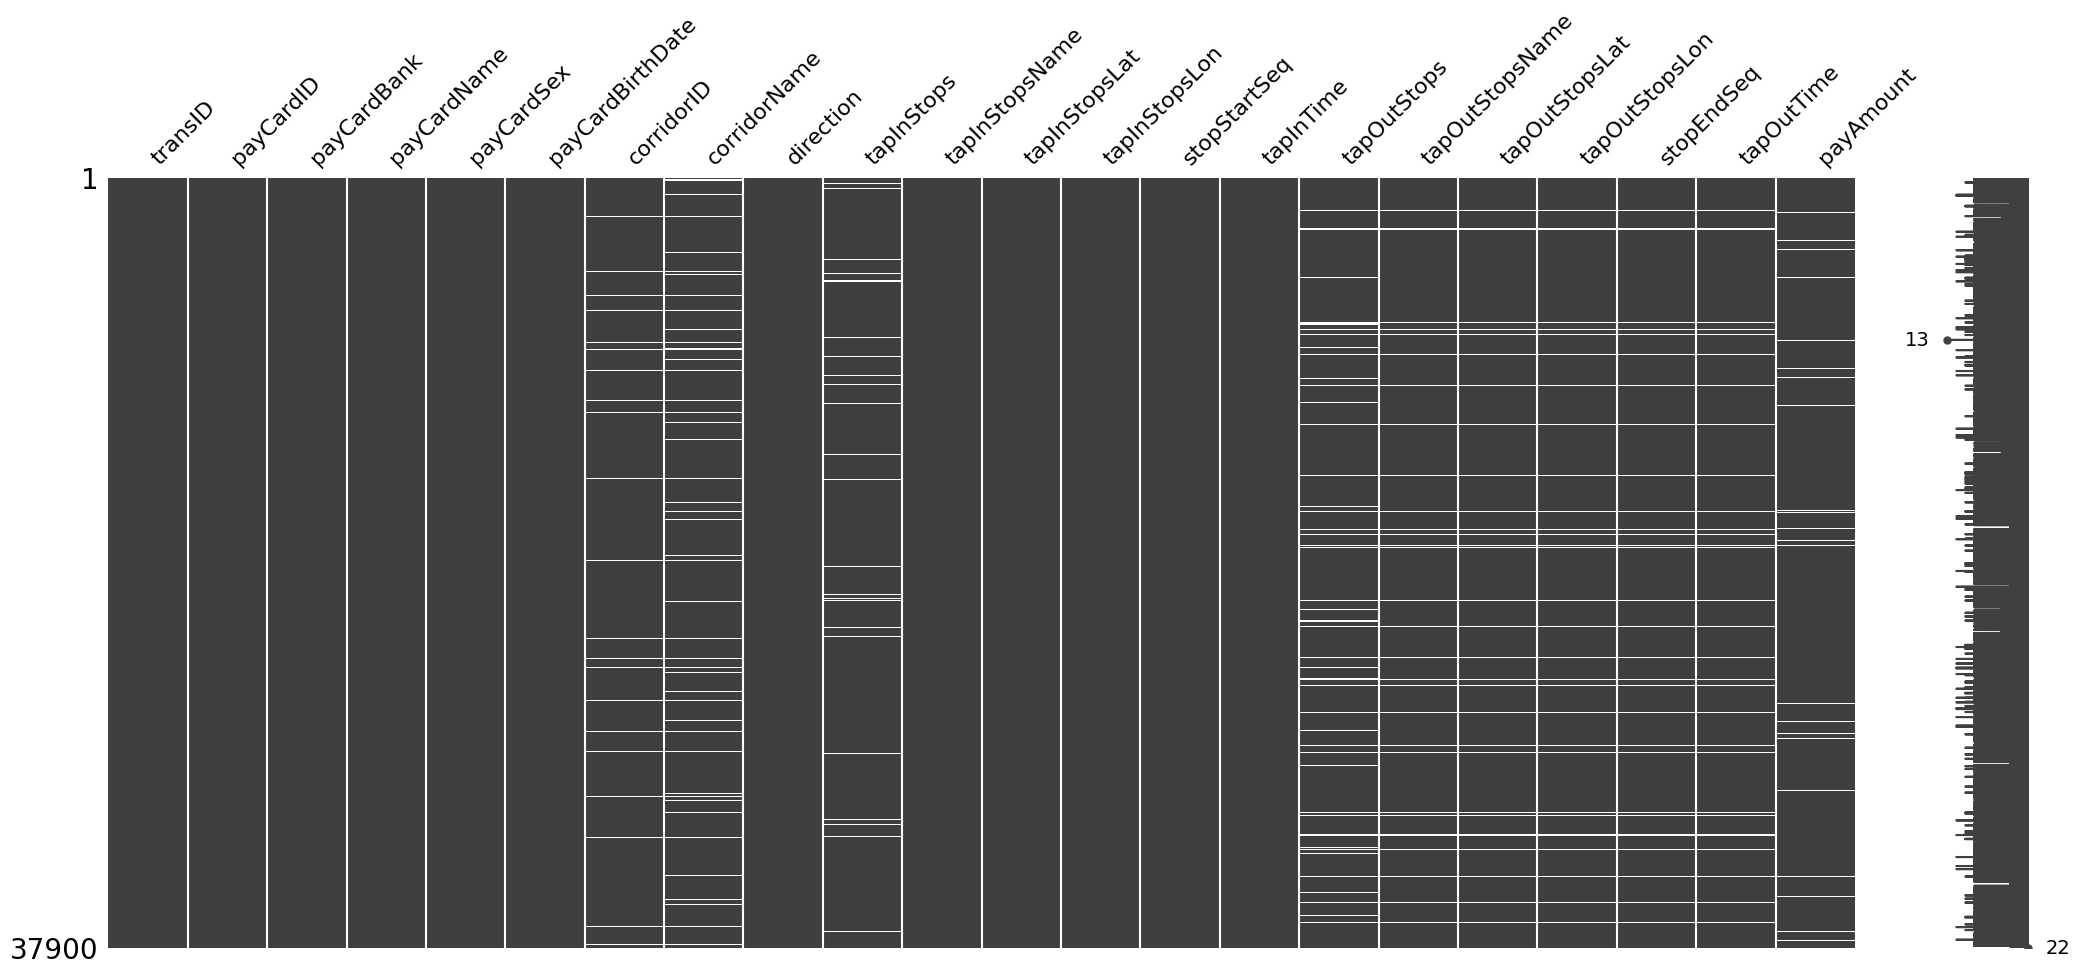

In [151]:
# identify which columns have missing values and how the missingness is distributed across the DataFrame.
msn.matrix(df)

Based on the information above, there're several missing value in this dataset such as in column 
* corridorID, 
* corridorName, 
* tapInStops, 
* tapOutStops, 
* tapOutStopsName, 
* tapOutStopsLon, 
* stopEndSeq, 
* tapOutTime

## Duplicated Check

In [152]:
# Find all duplicate rows in dataframe
df[df.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [153]:
# This code returns a new DataFrame containing only the rows from the original DataFrame df where the transID value appears multiple times. 
# In other words, it isolates the duplicate entries based on the transID column.
df[df['transID'].duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


As we can see, there's no duplicated row in this dataset

## Detect Outliers

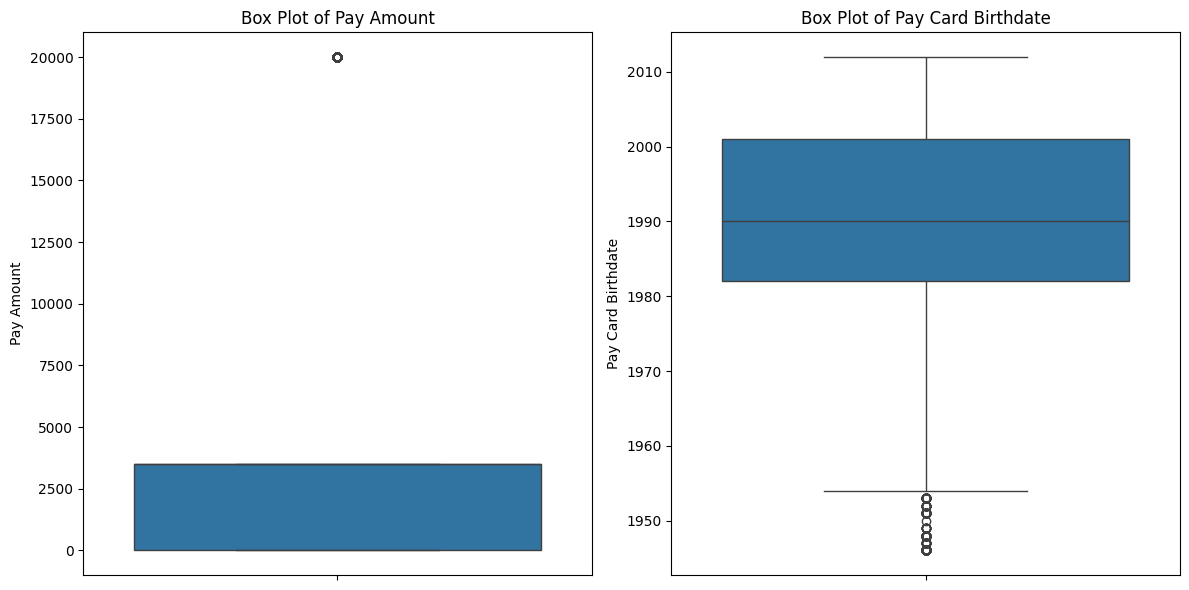

In [154]:
# Create subplots with 1 row and 2 columns (2 figures)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize for better visualization

# Create boxplot for payAmount
sns.boxplot(ax=axes[0], y=df['payAmount'])  # Replace 'group' with your group column if applicable
axes[0].set_title('Box Plot of Pay Amount')
axes[0].set_ylabel('Pay Amount')

# Create boxplot for payCardBirthDate
sns.boxplot(ax=axes[1], y=df['payCardBirthDate'])  # Replace 'group' with your group column if applicable
axes[1].set_title('Box Plot of Pay Card Birthdate')
axes[1].set_ylabel('Pay Card Birthdate')

# Rotate x labels to prevent overlapping (optional)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)  # Adjust rotation angle for better readability

# Tight layout to prevent overlapping elements (optional)
plt.tight_layout()

plt.show()

* Payamount for 20000 is detected by outliers, but in this case, we would not delete it since this is still make sense
* Birthdate also exist the outliers below the lower bound. But, we would not drop it since this is important for analysis.

# Data Cleansing

## Handling Missing Values

### Filling Corridor ID columns

* This code fills the missing values in the corridorID column by leveraging the most frequent value (mode) for each group identified by the corridorName. 
* It first finds the mode for each corridor name and then creates a dictionary to map corridor names to their corresponding modes. 
* Finally, it iterates through each row in the DataFrame and fills the missing corridorID values based on the corridorName using the created dictionary.

In [155]:
# Group by corridor ID by corridorName to get mode corridorID in corridorName
corr_ID = df.groupby('corridorName')['corridorID'].apply(lambda k: k.mode()[0]).reset_index()
corr_ID


,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


In [156]:
# Create dictionary named corrID_mapping. The disctionary key becomes the corridorName, and 
# the value becomes the corresponding mode (most frequent) corridorID for that corridor name.
corrID_mapping = dict(zip(corr_ID['corridorName'], corr_ID['corridorID']))
corrID_mapping

{'Andara - Stasiun Universitas Pancasila': 'JAK.44',
 'BKN - Blok M': 'M7B',
 'BSD - Jelambar': 'S11',
 'BSD Serpong - Fatmawati': 'S12',
 'Batusari - Grogol': '8K',
 'Bekasi Barat - Blok M': 'B13',
 'Bekasi Barat - Kuningan': 'B14',
 'Bekasi Timur - Cawang': 'B21',
 'Bintara - Cipinang Indah': 'JAK.85',
 'Bintaro - Blok M': '8E',
 'Bintaro - Fatmawati': 'S31',
 'Blok M - Andara': 'JAK.31',
 'Blok M - Kota': '1',
 'Blok M - PGC': '7Q',
 'Blok M - Pasar Minggu': '6U',
 'Blok M - Universitas Indonesia': '9H',
 'Bulak Ringin - Kampung Rambutan': 'JAK.38',
 'Bulak Turi - Tanjung Priok': 'JAK.15',
 'Cawang UKI - Lubang Buaya': 'JAK.20',
 'Cempaka Putih - Pulo Gadung via Kelapa Gading': 'JAK.61',
 'Cibubur - BKN': '7C',
 'Cibubur - Balai Kota': '1T',
 'Cibubur - Kuningan': '6P',
 'Cibubur Junction - Blok M': '1K',
 'Cilangkap - Cililitan': 'JAK.36',
 'Ciledug - Tendean': '13',
 'Cililitan - Condet': 'JAK.16',
 'Cililitan - Condet via Kayu Manis': 'JAK.37',
 'Cililitan - Dwikora': 'JAK.21',
 

In [157]:
# Filling missing value with mode if corridorID is null and corridorName is not null
df['corridorID'] = df.apply(
    lambda row: corrID_mapping[row['corridorName']] 
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName'])  
    else row['corridorID'],
    axis=1
)

In [158]:
# Check the rest amount of null value in corridorID
df['corridorID'].isna().sum()

1125

The rest amount of null value is corridorID after we fill missing value is 1125

### Fill Corridor Name Columns

* This code fills the missing values in the corridorName column by leveraging the most frequent value (mode) for each group identified by the corridorID. 
* It first finds the mode for each corridor id and then creates a dictionary to map corridor id to their corresponding modes. 
* Finally, it iterates through each row in the DataFrame and fills the missing corridorName values based on the corridorID using the created dictionary.

In [159]:
# Group by corridorName by corridorID to get mode corridorName in corridorID
corrName = df.groupby('corridorID')['corridorName'].apply(lambda x: x.mode()[0]).reset_index()
corrName

,corridorID,corridorName
0,1,Blok M - Kota
1,10,Tanjung Priok - PGC 2
2,10A,Rusun Marunda - Tanjung Priok
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang
4,10D,Kampung Rambutan - Tanjung Priok
...,...,...
216,S21,Ciputat - CSW
217,S22,Ciputat - Kampung Rambutan
218,S31,Bintaro - Fatmawati
219,T11,Poris Plawad - Bundaran Senayan


In [160]:
# Create dictionary named corrName_mapping. The disctionary key becomes the corridorID, and 
# the value becomes the corresponding mode (most frequent) corridorName for that corridorID.
corrName_mapping = dict(zip(corrName['corridorID'], corrName['corridorName']))
corrName_mapping

{'1': 'Blok M - Kota',
 '10': 'Tanjung Priok - PGC 2',
 '10A': 'Rusun Marunda - Tanjung Priok',
 '10B': 'Rusun Cipinang Besar Selatan - Penas Kalimalang',
 '10D': 'Kampung Rambutan - Tanjung Priok',
 '10H': 'Tanjung Priok - Blok M',
 '10K': 'Tanjung Priok - Senen via Taman BMW',
 '11': 'Pulo Gebang - Matraman',
 '11B': 'Rusun Rawa Bebek - Penggilingan',
 '11C': 'Rusun Pinus Elok - Rusun Pulo Gebang',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '11K': 'Rusun Komarudin - Penggilingan',
 '11M': 'Rusun Rawa Bebek - Bukit Duri',
 '11N': 'Rusun Cipinang Muara - Jatinegara',
 '11P': 'Rusun Pondok Bambu - Walikota Jakarta Timur',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 '12': 'Tanjung Priok - Pluit',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '12B': 'Pluit - Senen',
 '12C': 'Rusun Waduk Pluit - Penjaringan',
 '12F': 'Rusun Marunda - Rusun Waduk Pluit',
 '12H': 'Rusun Penjaringan - Penjaringan',
 '12P': 'St. LRT Pegangsaan Dua - JIS',
 '13': 'Ciledug - Tendean',
 '13B': 'Puri Beta - Panc

In [161]:
# Filling missing value with mode if corridorID is null and corridorName is not null
df['corridorName'] = df.apply(
    lambda row: corrName_mapping[row['corridorID']] 
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID'])  
    else row['corridorName'],
    axis=1
)

In [162]:
# Check the rest amount of null value in corridorName
df['corridorName'].isna().sum()

1125

Remaining of null value in corridorName after we fill missing value is 1125

### Fill tap in stop 

In [163]:
# Group by tapInStops by tapInStopsName to get mode (most frequent) tapInStops in tapInStopsName
TIS_ID = df.groupby('tapInStopsName')['tapInStops'].apply(lambda i: i.mode().iloc[0] if not i.mode().empty else None).reset_index()
TIS_ID

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


In [164]:
# Create dictionary named TIS_mapping. The disctionary key becomes the tapInStopsName, and 
# the value becomes the corresponding mode (most frequent) tapInStops for that tapInStopsName.
TIS_mapping = dict(zip(TIS_ID['tapInStopsName'], TIS_ID['tapInStops']))
TIS_mapping

{'18 Office Park': 'B00001P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'AKR Tower': 'B00018P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'Adam Malik': 'P00001',
 'Adam Malik 1': 'B00008P',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Akper Fatmawati Pondok Labu': 'B00017P',
 'Al Izhar Pondok Labu 2': 'B00027P',
 'Al Khairiyah School': 'B00028P',
 'Al Mukhlisin': 'B00030P',
 'Al Wathoniyah 1': 'B00031P',
 'Al Wathoniyah 2': 'B00032P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 3': 'B00037P',
 'Ampera Garden': 'B00039P',
 'Ampera Yos Sudarso': 'B00040P',
 'Ananda Pulo Gadung': 'B00041P',
 'Ancol': 'P00003',
 'Ancol Pintu 2': 'B06000P',
 'Andara Margasatwa 2': 'B00043P',
 'Andara Margasatwa 3': 'B00044P',
 'Andara Margasatwa 4': 'B00045P',
 'Aneka Apotek': 'B00046P',
 'Aneka PIK Penggilingan': 'B00048P',
 'Antena III': 'B00052P',
 'Apartemen Kedoya Elok 2': 'B00056P',
 'Apartemen Simprug Te

In [165]:
# Filling missing value with mode if tapInStops is null and tapInStopsName is not null
df['tapInStops'] = df.apply(
    lambda row: TIS_mapping[row['tapInStopsName']] 
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName'])  
    else row['tapInStops'],
    axis=1
)

In [166]:
# Check the rest amount of null value in tapInStops
df['tapInStops'].isna().sum()

34

The rest amount of null value is tapInStops after we fill missing value is 34

### Fill Tap Out Stop

In [167]:
# Group by tapOutStops by tapOutStopsName to get mode (most frequent) tapOutStops in tapOutStopsName
TOS_ID = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda o: o.mode().iloc[0] if not o.mode().empty else None).reset_index()
TOS_ID

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


In [168]:
# Create dictionary named TOS_mapping. The disctionary key becomes the tapOutStopsName, and 
# the value becomes the corresponding mode (most frequent) tapOutStops for that tapOutStopsName.
TOS_mapping = dict(zip(TOS_ID['tapOutStopsName'], TOS_ID['tapOutStops']))
TOS_mapping

{'ABA': 'B00002P',
 'ACC Simatupang': 'B00004P',
 'ACE Hardware': 'B00005P',
 'ASEAN': 'P00004',
 'ASMI': 'P00005',
 'ASMI 2': 'B00070P',
 'ASSA': 'B06010P',
 'AURI Jatibaru': 'B00086P',
 'Acacia Residence': 'B00003P',
 'Adam Malik': 'P00001',
 'Ahmad Yani Bea Cukai': 'P00002',
 'Ahmad Yani Bea Cukai 1': 'B06534P',
 'Ahmad Yani Pisangan Baru': 'B00013P',
 'Akademi Farmasi Mahadhika': 'B00015P',
 'Akses Jembatan Ciliwung Balekambang': 'B00022P',
 'Al Khairiyah School': 'B00028P',
 'Al Mahbubiyah': 'B00029P',
 'Al Mukhlisin': 'B00030P',
 'Al-Wathoniyah': 'B06709P',
 'Allianz': 'B00034P',
 'Ambassador': 'B02183P',
 'Ampera 1': 'B00035P',
 'Ampera 2': 'B00036P',
 'Ampera 4': 'B00038P',
 'Ancol': 'P00003',
 'Andara Margasatwa 1': 'B00042P',
 'Antena II': 'B00053P',
 'Apartemen Simprug Teras': 'B00058P',
 'Apotik Rini Rawamangun': 'B00060P',
 'Arsip Nasional RI 1': 'B00066P',
 'Arsip Nasional RI 2': 'B00067P',
 'Asrama Marinir Marunda 2': 'B00074P',
 'Asshomadiyah Medicare Centre 2': 'B00077

In [169]:
# Filling missing value with mode if tapOutStops is null and tapOutStopsName is not null
df['tapOutStops'] = df.apply(
    lambda row: TOS_mapping[row['tapOutStopsName']] 
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName'])  
    else row['tapOutStops'],
    axis=1
)

In [170]:
# Check the rest amount of null value in tapOutStops
df['tapOutStops'].isna().sum()

1363

The rest amount of null value is tapOutStops after we fill missing value is 1363

## Fill payAmount

Based on Transjakarta webiste, pay amount is devided by the type of transport, which are:

- 20,000 for Royaltrans.
- 3,500 for Reguler.
- 0 for Mikrotrans.

Let's fill payAmount column based corridorID on this data. 
- royaltrans are used this corridorID '1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31', 'T21'
- mikrotrans is started with JAK in corridorID-

<url>https://transjakarta.co.id/faq-transjakarta/<url> 

In [171]:
# Assigning Missing Value in payAmount column based on corridorID
royaltrans_corridors = ['1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S13', 'S14', 'S31', 'T21']
mikrotrans_starts = 'JAK'

def assign_payamount(corridor_id):
  if corridor_id in royaltrans_corridors:
    return 20000.0
  elif str(corridor_id).startswith(mikrotrans_starts):
    return 0.0
  else:
    return 3500.0

df['payAmount'] = df['corridorID'].apply(assign_payamount)


In [172]:
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


### Drop columns

After attempting to replace the NaN values by filling them with the actual or closest values, there are still some NaN values remaining. These remaining NaN values will be dropped or deleted because there is no other way to replace them.

In [173]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35428 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           35428 non-null  object 
 1   payCardID         35428 non-null  int64  
 2   payCardBank       35428 non-null  object 
 3   payCardName       35428 non-null  object 
 4   payCardSex        35428 non-null  object 
 5   payCardBirthDate  35428 non-null  int64  
 6   corridorID        35428 non-null  object 
 7   corridorName      35428 non-null  object 
 8   direction         35428 non-null  float64
 9   tapInStops        35428 non-null  object 
 10  tapInStopsName    35428 non-null  object 
 11  tapInStopsLat     35428 non-null  float64
 12  tapInStopsLon     35428 non-null  float64
 13  stopStartSeq      35428 non-null  int64  
 14  tapInTime         35428 non-null  object 
 15  tapOutStops       35428 non-null  object 
 16  tapOutStopsName   35428 non-null  object 
 17

In [174]:
df['tapInStopsName'].unique()

array(['Pal Putih', 'Kemenkes 2', 'Gg. Kunir II', ..., 'AKR Tower',
       'Jln. Kartika Meruya Selatan', 'Jln. Gunung Galunggung 1'],
      dtype=object)

## Change Data Type

Some of the data types in your dataset are not ideal for data analysis. Let's change tapInTime and tapOutTime into proper data type

In [175]:
# Change to datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

## Create new columns

In [176]:
# Calculate age
df['age'] = 2023 - df['payCardBirthDate'] 

# Extract time components from tapInTime
df['time'] = df['tapInTime'].dt.time
df['hour'] = df['tapInTime'].dt.hour
df['day'] = df['tapInTime'].dt.day_name()
# Extract the week number from the date
df['week'] = df['tapInTime'].dt.isocalendar().week

# Create tripTimeSpent to calculate how long customer takes for each trip 
df['tripTimeSpent'] = df['tapOutTime'] - df['tapInTime']

# Convert tripTimeSpent to a more user-friendly format (e.g., minutes)
df['tripTimeSpent'] = df['tripTimeSpent'].dt.total_seconds() / 60

# Combine tapInStopName and tapOutStopName to identify route for each customer
df['route'] = df['tapInStopsName'] + ' - ' + df['tapOutStopsName']

df['type'] = df['payAmount'].map({
    20000: "royaltrans",
    3500:"transjakarta",
    0:"mikrotrans"})

In [208]:
df.sample(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,time,hour,day,week,tripTimeSpent,route,type
36645,SDQG091G6F77RV,213189102300294,emoney,Ajimat Rahmawati,F,2007,JAK.60,Kelapa Gading - Rusun Kemayoran,0.0,B01166P,Jln. Janur Indah XI,-6.155924,106.90801,6,2023-04-17 16:29:03,B02681P,Ps. Serdang 1,-6.156262,106.864740,45.0,2023-04-17 17:54:13,0.0,16,16:29:03,16,Monday,16,85.166667,Jln. Janur Indah XI - Ps. Serdang 1,mikrotrans
10363,XSOC638H7C95LU,180074853270640,emoney,"Dr. Laswi Usamah, S.Ked",F,1959,7Q,Blok M - PGC,1.0,B05899P,Wolter Monginsidi,-6.238799,106.81376,26,2023-04-26 06:37:08,B01437P,Jln. Palatehan,-6.240057,106.800758,31.0,2023-04-26 07:20:06,3500.0,64,06:37:08,6,Wednesday,17,42.966667,Wolter Monginsidi - Jln. Palatehan,transjakarta
34986,SKWS711M3X31VD,3566956122502027,dki,Damar Hutagalung,F,2011,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05640P,Taman PIK Penggilingan,-6.204200,106.93176,11,2023-04-13 09:38:24,B02800P,Perum Tpi 1,-6.197379,106.935130,22.0,2023-04-13 10:21:49,3500.0,12,09:38:24,9,Thursday,15,43.416667,Taman PIK Penggilingan - Perum Tpi 1,transjakarta
21537,QFYR445W2I26TD,4266760335382388,dki,Hari Maulana,F,2002,JAK.41,Kampung Melayu - Pulo Gadung,1.0,B04486P,Sbr. SMPN 232,-6.202926,106.88278,17,2023-04-14 19:03:23,B04805P,Simpang Gading Pori Raya,-6.209232,106.881530,22.0,2023-04-14 20:10:23,0.0,21,19:03:23,19,Friday,15,67.000000,Sbr. SMPN 232 - Simpang Gading Pori Raya,mikrotrans
13452,TERC196Z9E65GV,376364308641089,emoney,"Kusuma Hassanah, S.E.",F,2007,8,Lebak Bulus - Pasar Baru via Tomang,0.0,P00087,Jelambar,-6.166548,106.78651,17,2023-04-04 08:53:40,P00161,Pecenongan,-6.167710,106.828190,23.0,2023-04-04 09:14:27,3500.0,16,08:53:40,8,Tuesday,14,20.783333,Jelambar - Pecenongan,transjakarta
11372,CXXQ899K9F24VJ,4846285352667528,dki,Ilyas Rahimah,F,1984,JAK.21,Cililitan - Dwikora,1.0,B00255P,Cililitan Besar 1,-6.263567,106.86709,30,2023-04-27 16:48:07,B02828P,PGC Dalam,-6.261841,106.865700,31.0,2023-04-27 18:25:20,0.0,39,16:48:07,16,Thursday,17,97.216667,Cililitan Besar 1 - PGC Dalam,mikrotrans
37243,UAZI250R2K60IQ,346207628214482,emoney,drg. Paulin Mandala,M,1966,JAK.37,Cililitan - Condet via Kayu Manis,1.0,B00484P,Gg. H. Yahya Balekambang,-6.287078,106.85064,4,2023-04-19 11:43:05,B00910P,Jln. Batu Tulis II,-6.280482,106.862710,29.0,2023-04-19 12:12:46,0.0,57,11:43:05,11,Wednesday,16,29.683333,Gg. H. Yahya Balekambang - Jln. Batu Tulis II,mikrotrans
19729,OXVE143L1U78JP,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,Yon Arhanud - 10 Pesanggrahan,-6.258076,106.75626,26,2023-04-12 19:35:31,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.751900,39.0,2023-04-12 21:17:33,0.0,67,19:35:31,19,Wednesday,15,102.033333,Yon Arhanud - 10 Pesanggrahan - Jln. Manunggal...,mikrotrans
22630,EXXB320R3M83IT,180006537547852,emoney,"Lanang Pertiwi, M.M.",F,1983,JAK.39,Kalimalang - Duren Sawit,1.0,B00227P,Carrefour Buaran,-6.218653,106.92370,17,2023-04-17 21:13:03,B01578P,Jln. Serdang,-6.228906,106.914590,26.0,2023-04-17 22:12:05,0.0,40,21:13:03,21,Monday,16,59.033333,Carrefour Buaran - Jln. Serdang,mikrotrans
4396,MVXI244Y5H69LC,180006387820342,emoney,Gandi Salahudin,F,1990,JAK.29,Tanjung Priok - Sukapura,1.0,B03211P,RSUD Koja,-6.108205,106.89982,7,2023-04-12 06:47:27,B05577P,Taman Barito Sembar,-6.132105,106.920230,32.0,2023-04-12 07:16:12,0.0,33,06:47:27,6,Wednesday,15,28.750000,RSUD Koja - Taman Barito Sembar,mikrotrans


# EDA

## Distribution of Gender

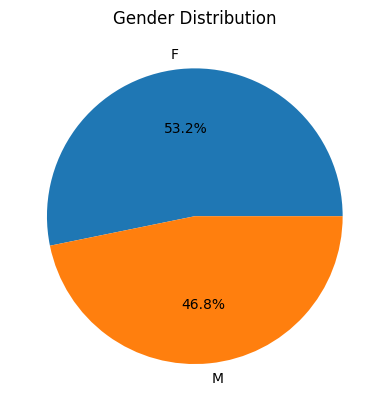

In [177]:
# Group data by gender and calculate counts
gender_counts = df['payCardSex'].value_counts().sort_values(ascending=False)

# Get pie chart slice labels
pie_chart_slice_labels = gender_counts.index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = gender_counts.to_numpy()

# Create a pie chart
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")  # Adjust autopct for desired precision

# Add a title
plt.title("Gender Distribution")

# Show the pie chart
plt.show()

## Distribution of Payment Type

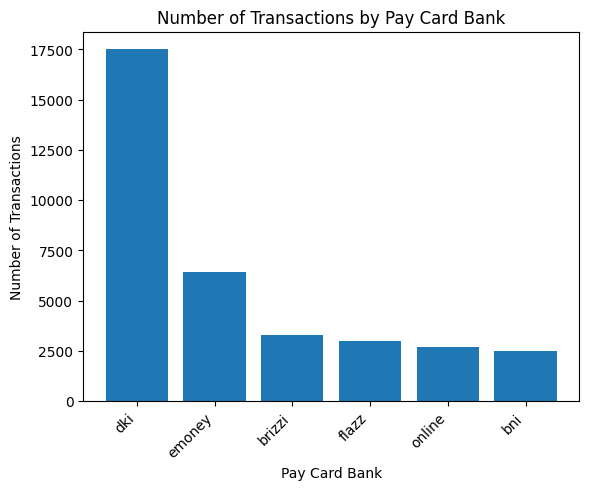

In [178]:
# Group data by payCardBank and count transactions
paycard_bank_counts = df['payCardBank'].value_counts().sort_values(ascending=False)

# Get bar chart labels and data
bar_chart_labels = paycard_bank_counts.index.to_numpy()
bar_chart_data = paycard_bank_counts.to_numpy()

# Create a bar chart
plt.bar(bar_chart_labels, bar_chart_data)

# Add labels and title
plt.xlabel('Pay Card Bank')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pay Card Bank')

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed

# Show the bar chart
plt.show()

## Distribution of Age

In [179]:
# Define age groups 
age_groups = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 100])

# Count occurrences in each age group
age_group_counts = age_groups.value_counts().sort_index()
age_group_counts

age
(0, 20]       7476
(20, 30]      7764
(30, 40]     11020
(40, 50]      5724
(50, 100]     3444
Name: count, dtype: int64

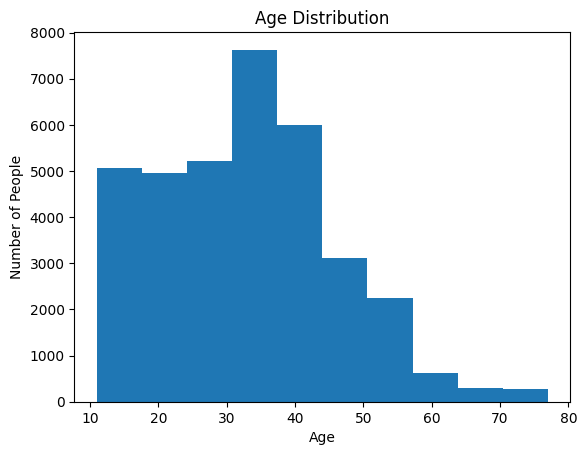

In [180]:
# Create a histogram (directly using ages)
plt.hist(df['age'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')

plt.show()

## Distribution of Trip Duration

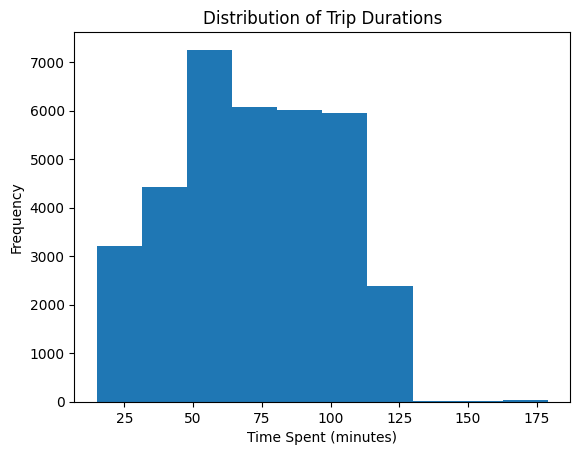

In [181]:
plt.hist(df['tripTimeSpent'])
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

## Top 10 Corridor Name

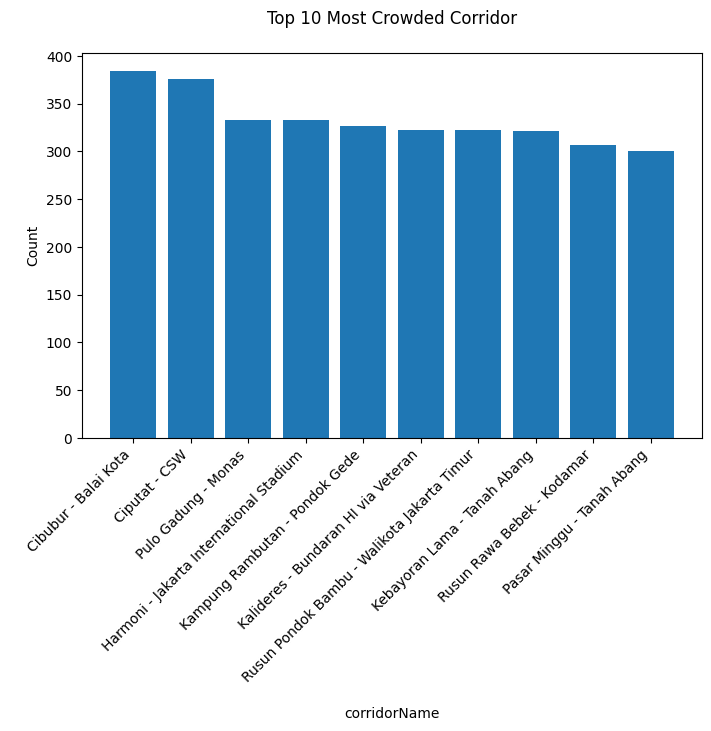

In [182]:
# Get the top 10 corridor names
top_10_corridors = df['corridorName'].value_counts().head(10).reset_index()

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top_10_corridors['corridorName'], top_10_corridors['count'])

# Add labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\ncorridorName', size=10)
plt.title('Top 10 Most Crowded Corridor\n', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed


plt.show()

## Top 10 Corridor ID by Daily Average Passangers

In [183]:
# Group by corridorID and calculate average travel time
corridorID_group = df.groupby(['day','corridorID'])['tripTimeSpent'].agg(['mean', 'median', 'count']).reset_index()
top10_avg_passangers_corridor = corridorID_group.groupby(['corridorID'])['count'].median().reset_index().sort_values(by='count',ascending=False).head(10)


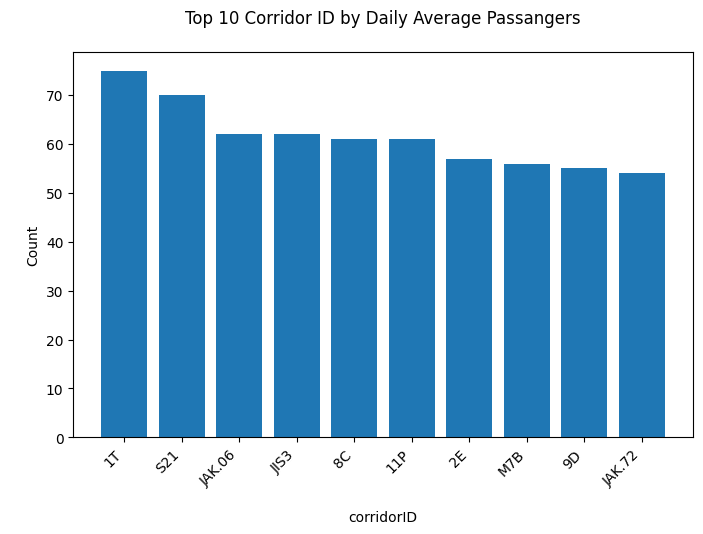

In [184]:
# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_avg_passangers_corridor['corridorID'], top10_avg_passangers_corridor['count'])

# Add labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\ncorridorID', size=10)
plt.title('Top 10 Corridor ID by Daily Average Passangers\n', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed


plt.show()

* Most popular are 1T from royaltrans 
* S21 from Transjabodetabek
* jak06 from mikrotrans

## Top 10 Corridor ID by Daily Average Duration

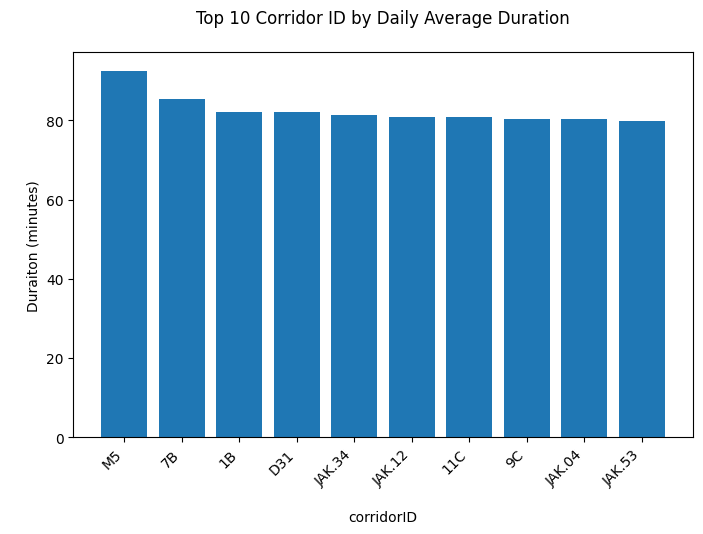

In [185]:
top10_avg_duration_corridor = corridorID_group.groupby(['corridorID'])['mean'].mean().reset_index().sort_values(by='mean',ascending=False).head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_avg_duration_corridor['corridorID'], top10_avg_duration_corridor['mean'])

# Add labels and title
plt.ylabel('\nDuraiton (minutes)', size=10)
plt.xlabel('\ncorridorID', size=10)
plt.title('Top 10 Corridor ID by Daily Average Duration\n', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed


plt.show()


## Top 10 Popular Halte based on Tap In

In [186]:
popular_tapin = df.groupby('tapInStopsName').size().sort_values(ascending=False)
popular_tapin = popular_tapin.reset_index().rename(columns={0:'count'})
popular_tapin

,tapInStopsName,count
0,Penjaringan,229
1,Garuda Taman Mini,198
2,BKN,159
3,BNN LRT,145
4,Pejaten,144
...,...,...
2486,SDN Pondok Kelapa 05,1
2487,SDN Ragunan 14,1
2488,SDN Rawamangun 05,1
2489,SDN Srengseng Sawah 01,1


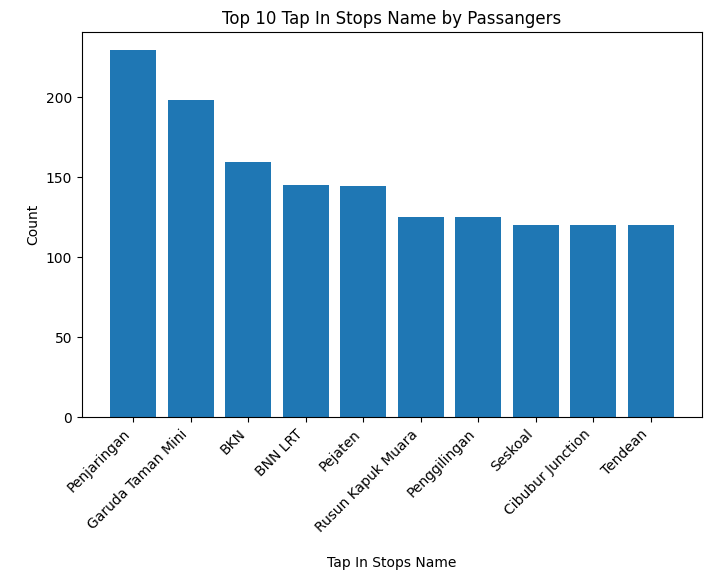

In [187]:
top10_popular_tapin = popular_tapin.head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_popular_tapin['tapInStopsName'], top10_popular_tapin['count'])

# Add labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\nTap In Stops Name', size=10)
plt.title('Top 10 Tap In Stops Name by Passangers', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed


plt.show()


## Top 10 Popular Halte based on Tap Out

In [188]:
popular_tapout = df.groupby('tapOutStopsName').size().sort_values(ascending=False)
popular_tapout = popular_tapout.reset_index().rename(columns={0:'count'})
popular_tapout

,tapOutStopsName,count
0,BKN,302
1,Penjaringan,264
2,Term. Senen,188
3,Monas,158
4,Term. Kampung Rambutan,158
...,...,...
2182,Jln. Telepon Kota,1
2183,Jln. Budi Mulia Utara,1
2184,Sbr. Puskesmas Kel. Dukuh,1
2185,Sbr. Puskesmas Kel. Semper Barat II,1


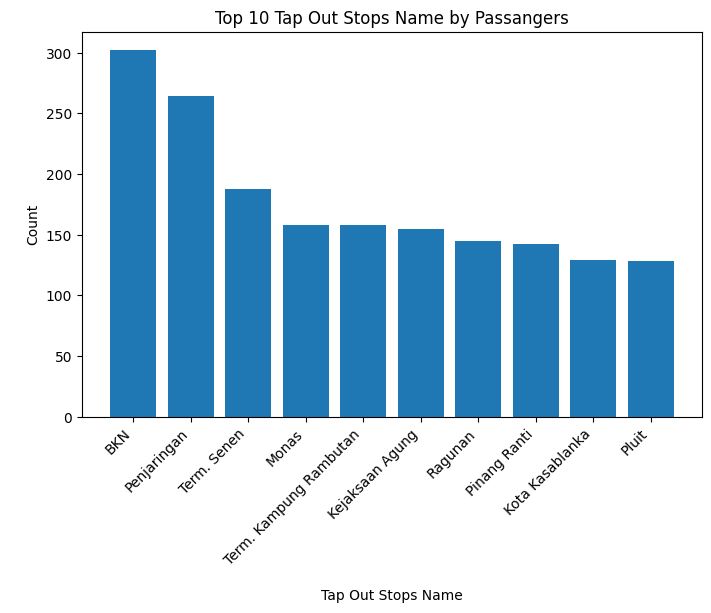

In [189]:
top10_popular_tapout = popular_tapout.head(10)

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot
plt.bar(top10_popular_tapout['tapOutStopsName'], top10_popular_tapout['count'])

# Add labels and title
plt.ylabel('\nCount', size=10)
plt.xlabel('\nTap Out Stops Name', size=10)
plt.title('Top 10 Tap Out Stops Name by Passangers', size=12)

# Rotate x labels for readability (optional)
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment as needed


plt.show()


## Popular Route

In [190]:
popular_route = df['route'].value_counts().reset_index()
popular_route

,route,count
0,Rusun Kapuk Muara - Penjaringan,125
1,Penjaringan - Rusun Kapuk Muara,112
2,Garuda Taman Mini - BKN,98
3,Cibubur Junction - BKN,83
4,Garuda Taman Mini - Pinang Ranti,82
...,...,...
4298,Jembatan Merah - Pasar Baru Timur,1
4299,Landmark Pluit Auto Plaza - Pakin,1
4300,Rawa Buaya - Kalideres,1
4301,Simpang Kb. Baru 2 - STIP,1


## Rusun Penjaring analysis with the most route but have low average hour in saturday morning

In [191]:
rusun_penjaringan = df[df['route']=='Rusun Kapuk Muara - Penjaringan']
rusun_penjaringan.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,time,hour,day,week,tripTimeSpent,route,type
197,CGLW420M1F93GK,2720556419423963,dki,Devi Pangestu,M,1994,3C,Rusun Kapuk Muara - Penjaringan,0.0,B03277P,Rusun Kapuk Muara,-6.135667,106.76299,0,2023-04-03 05:11:54,P00170,Penjaringan,-6.126306,106.79203,1.0,2023-04-03 05:38:37,3500.0,29,05:11:54,5,Monday,14,26.716667,Rusun Kapuk Muara - Penjaringan,transjakarta
260,NYZR050S7R38IA,2245958200404051,dki,Tgk. Hamzah Hutagalung,M,1986,3C,Rusun Kapuk Muara - Penjaringan,0.0,B03277P,Rusun Kapuk Muara,-6.135667,106.76299,0,2023-04-03 05:45:16,P00170,Penjaringan,-6.126306,106.79203,1.0,2023-04-03 06:38:42,3500.0,37,05:45:16,5,Monday,14,53.433333,Rusun Kapuk Muara - Penjaringan,transjakarta
366,VJVK770E4P98GW,3569562588766630,dki,"dr. Sakura Budiman, S.IP",M,1972,3C,Rusun Kapuk Muara - Penjaringan,0.0,B03277P,Rusun Kapuk Muara,-6.135667,106.76299,0,2023-04-03 16:48:23,P00170,Penjaringan,-6.126306,106.79203,1.0,2023-04-03 17:51:43,3500.0,51,16:48:23,16,Monday,14,63.333333,Rusun Kapuk Muara - Penjaringan,transjakarta
797,DEKT042G7P31OG,2720556419423963,dki,Devi Pangestu,M,1994,3C,Rusun Kapuk Muara - Penjaringan,0.0,B03277P,Rusun Kapuk Muara,-6.135667,106.76299,0,2023-04-04 05:06:01,P00170,Penjaringan,-6.126306,106.79203,1.0,2023-04-04 05:49:24,3500.0,29,05:06:01,5,Tuesday,14,43.383333,Rusun Kapuk Muara - Penjaringan,transjakarta
860,PRBV913T9X95AK,2245958200404051,dki,Tgk. Hamzah Hutagalung,M,1986,3C,Rusun Kapuk Muara - Penjaringan,0.0,B03277P,Rusun Kapuk Muara,-6.135667,106.76299,0,2023-04-04 06:30:01,P00170,Penjaringan,-6.126306,106.79203,1.0,2023-04-04 07:20:31,3500.0,37,06:30:01,6,Tuesday,14,50.500000,Rusun Kapuk Muara - Penjaringan,transjakarta


In [192]:
rusun_penjaringan['tripTimeSpent'].describe()

count    125.000000
mean      62.664933
std       26.536063
min       21.883333
25%       40.366667
50%       56.850000
75%       85.050000
max      118.350000
Name: tripTimeSpent, dtype: float64

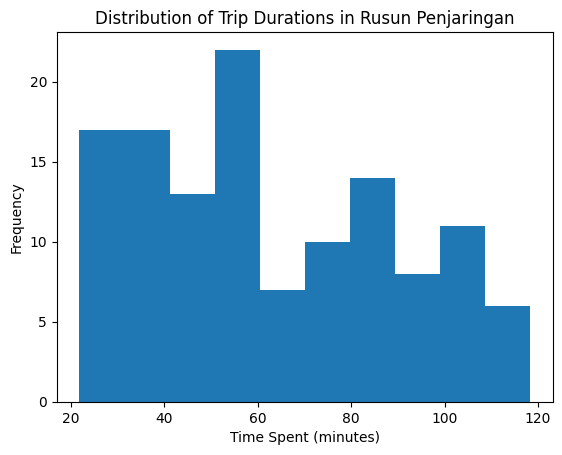

In [193]:
plt.hist(rusun_penjaringan['tripTimeSpent'])
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations in Rusun Penjaringan')
plt.show()

In [194]:
average_duration_per_day = rusun_penjaringan.groupby('day')['tripTimeSpent'].mean().reset_index()
average_duration_per_day.sort_index()

,day,tripTimeSpent
0,Friday,64.364394
1,Monday,65.829167
2,Saturday,70.650000
3,Sunday,43.433333
4,Thursday,57.728472
5,Tuesday,61.394203
6,Wednesday,62.711111


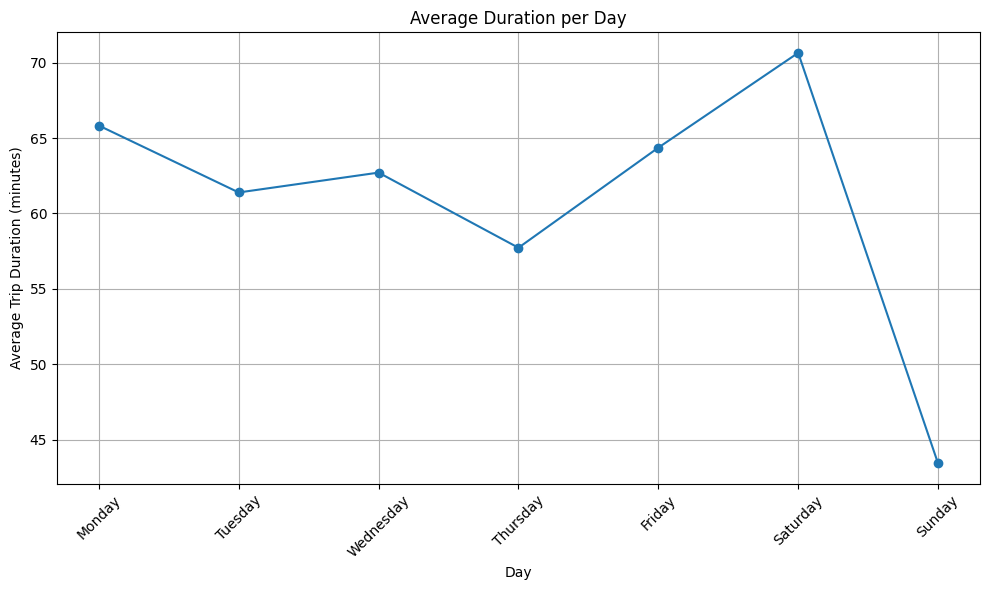

In [195]:
# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to categorical type with the specified order
average_duration_per_day['day'] = pd.Categorical(average_duration_per_day['day'], categories=day_order, ordered=True)

# Sort the DataFrame based on the ordered days
average_duration_per_day = average_duration_per_day.sort_values('day')

# Plotting the sorted data
plt.figure(figsize=(10, 6))
plt.plot(average_duration_per_day['day'], average_duration_per_day['tripTimeSpent'], marker='o')
plt.title('Average Duration per Day')
plt.xlabel('Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
saturday_hour = rusun_penjaringan[rusun_penjaringan['day']=='Saturday'].groupby('hour')['tripTimeSpent'].mean()
saturday_hour

hour
5     113.100000
8     100.133333
9      63.350000
13     30.950000
15     80.641667
18     40.725000
19     85.583333
Name: tripTimeSpent, dtype: float64

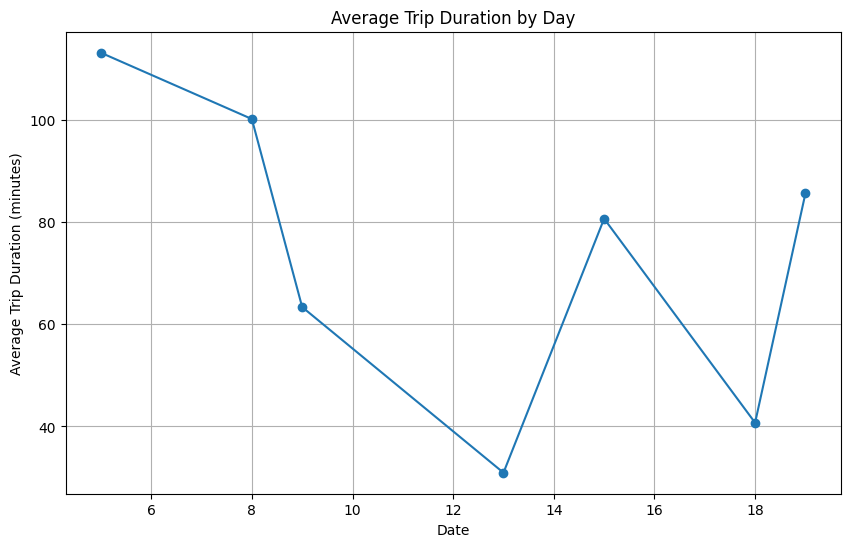

In [197]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
saturday_hour.plot(marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day')
plt.grid(True)
plt.show()

## Peak Times and Congestion Analysis

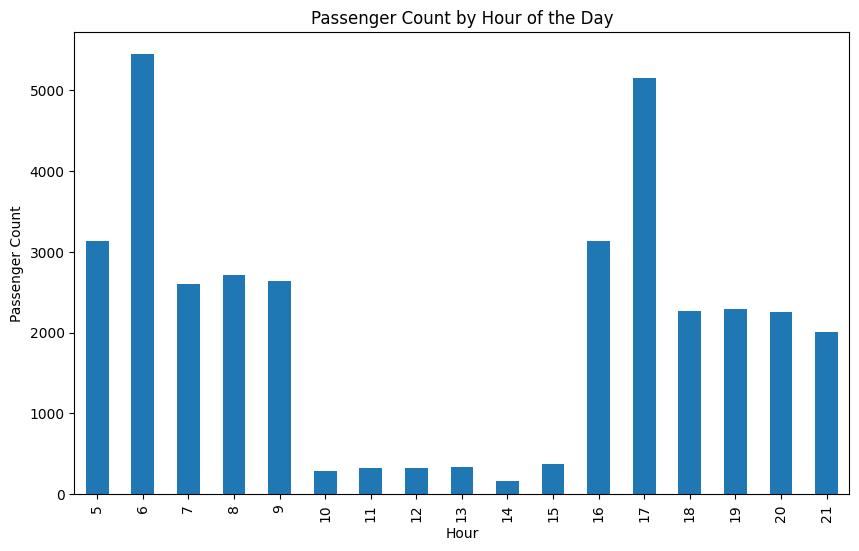

In [198]:
# Plot passenger count by hour
plt.figure(figsize=(10, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Passenger Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Passenger Count')
plt.show()

## Number of Passangers each day

In [199]:
number_of_passangers = df.groupby(['week','day'])['transID'].count().reset_index().rename(columns={'transID':'numberPassangers'})
number_of_passangers

,week,day,numberPassangers
0,13,Saturday,14
1,13,Sunday,7
2,14,Friday,1514
3,14,Monday,1495
4,14,Saturday,321
5,14,Sunday,350
6,14,Thursday,1491
7,14,Tuesday,1524
8,14,Wednesday,1494
9,15,Friday,1897


In [200]:
avg_day_passangers = number_of_passangers.groupby('day')['numberPassangers'].mean()
avg_day_passangers

day
Friday       1610.25
Monday       1598.00
Saturday      340.00
Sunday        343.80
Thursday     1597.50
Tuesday      1600.75
Wednesday    1595.75
Name: numberPassangers, dtype: float64

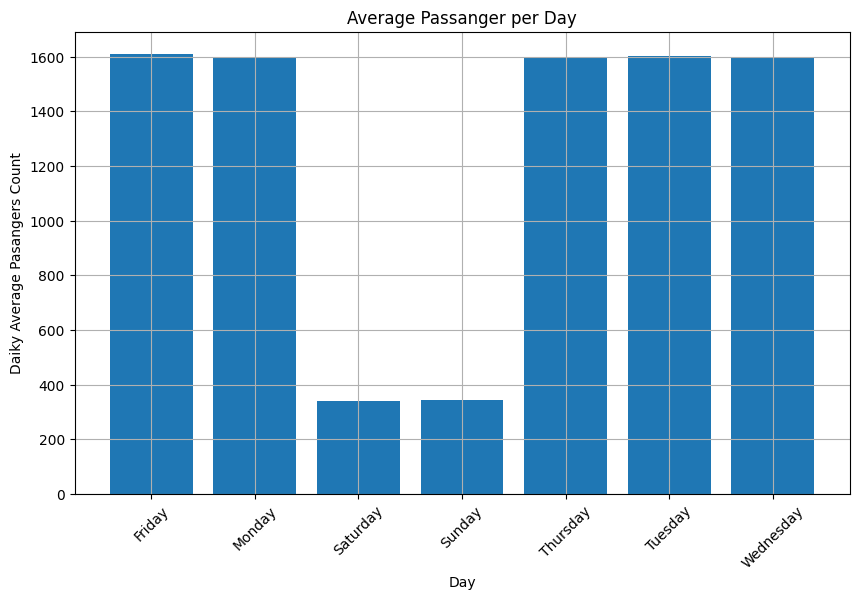

In [201]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(avg_day_passangers.index, avg_day_passangers.values)
plt.xlabel('Day')
plt.ylabel('Daiky Average Pasangers Count')
plt.title('Average Passanger per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

## Hourly Average Passangers 

In [202]:
day_hour = df.groupby(['week','day','hour']).size().reset_index().rename(columns={0:'numberPassangers'})
day_hour

,week,day,hour,numberPassangers
0,13,Saturday,6,2
1,13,Saturday,7,1
2,13,Saturday,9,1
3,13,Saturday,10,1
4,13,Saturday,12,1
...,...,...,...,...
430,17,Wednesday,17,228
431,17,Wednesday,18,95
432,17,Wednesday,19,108
433,17,Wednesday,20,90


In [203]:
day_hour_group = day_hour.groupby(['day','hour'])['numberPassangers'].mean().reset_index()

day_hour_group

,day,hour,numberPassangers
0,Friday,5,150.00
1,Friday,6,262.50
2,Friday,7,116.25
3,Friday,8,128.25
4,Friday,9,124.50
...,...,...,...
114,Wednesday,17,246.75
115,Wednesday,18,104.50
116,Wednesday,19,106.75
117,Wednesday,20,94.75


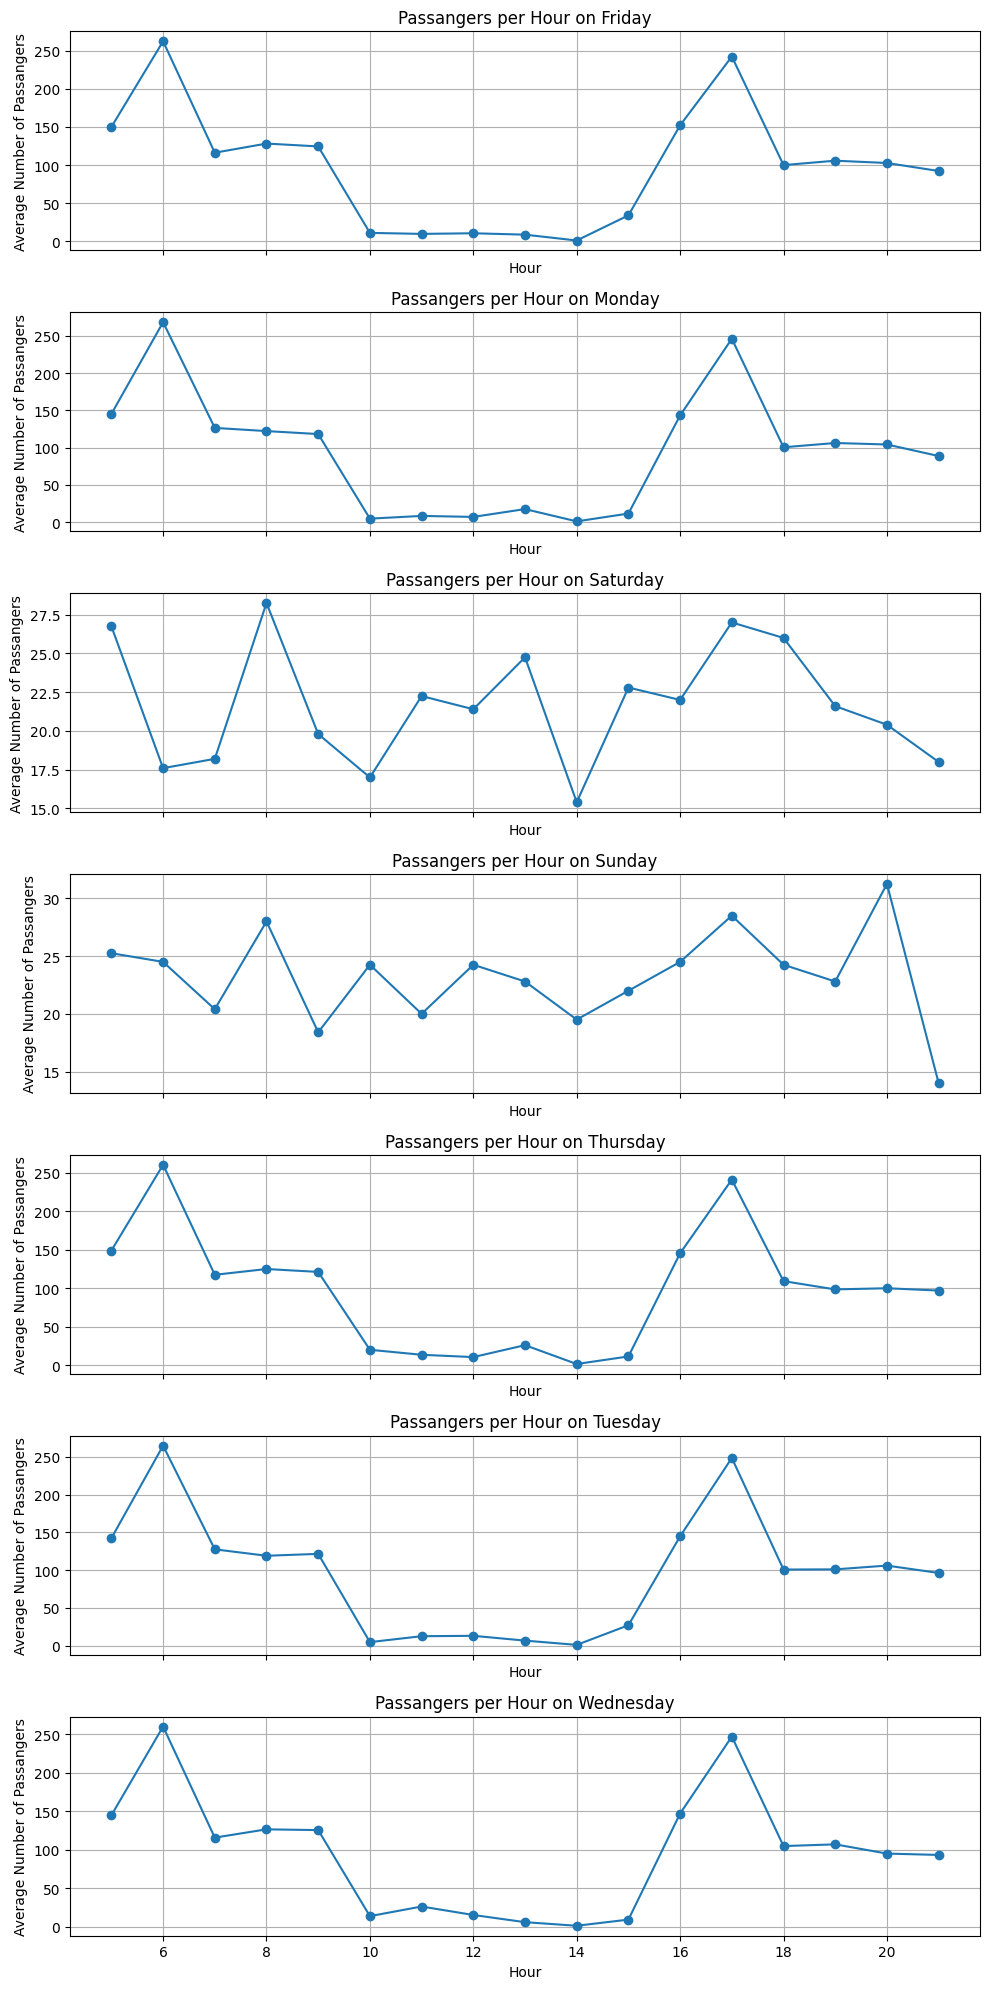

In [204]:
#List of days to plot
days = day_hour_group['day'].unique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(days), 1, figsize=(10, 20), sharex=True)

# Plotting each day
for i, day in enumerate(days):
    day_data = day_hour_group[day_hour_group['day'] == day]
    axes[i].plot(day_data['hour'], day_data['numberPassangers'], marker='o')
    axes[i].set_title(f'Passangers per Hour on {day}')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average Number of Passangers')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Export Dataset

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35428 entries, 0 to 37899
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           35428 non-null  object        
 1   payCardID         35428 non-null  int64         
 2   payCardBank       35428 non-null  object        
 3   payCardName       35428 non-null  object        
 4   payCardSex        35428 non-null  object        
 5   payCardBirthDate  35428 non-null  int64         
 6   corridorID        35428 non-null  object        
 7   corridorName      35428 non-null  object        
 8   direction         35428 non-null  float64       
 9   tapInStops        35428 non-null  object        
 10  tapInStopsName    35428 non-null  object        
 11  tapInStopsLat     35428 non-null  float64       
 12  tapInStopsLon     35428 non-null  float64       
 13  stopStartSeq      35428 non-null  int64         
 14  tapInTime         35428 non

In [210]:
df.to_csv('Transjakarta.csv', index=False)